In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import matplotlib.lines as ln
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score



In [5]:
datafile =r'/gdrive/My Drive/CIS_508/Datasets/Wholesale customers data.csv'
data=pd.read_csv(datafile)

print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [6]:
def display_all(df):
  with pd.option_context("display.max_rows",1000):
    with pd.option_context("display.max_columns",1000):
      return(df)

display_all(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
prediction_set=data.iloc[:,2:]
prediction_set.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Text(0.5, 1.0, 'Plotting the clusters from our original dataset')

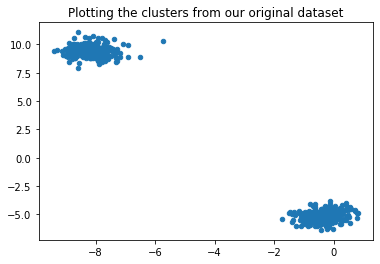

In [47]:
#plotting our data into clusters before running the algorithm

prediction_set,y_true=make_blobs(n_samples=440,centers=2,cluster_std=0.50,random_state=55)

plt.scatter(prediction_set[:,0],prediction_set[:,1],s=20);
plt.title("Plotting the clusters from our original dataset")



In [48]:
pd.DataFrame(prediction_set).info()
pd.DataFrame(prediction_set).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
0    440 non-null float64
1    440 non-null float64
dtypes: float64(2)
memory usage: 7.0 KB


,0,1
count,440.000000,440.000000
mean,-4.218921,2.143131
std,3.937989,7.289602
min,-9.398924,-6.363933
25%,-8.107051,-5.109622
50%,-3.735570,2.010393
75%,-0.285569,9.405062
max,0.820524,11.062323


In [49]:
#lets do the basic clustering by giving 2 as the n_clusters


kmeans=KMeans(n_clusters=2,random_state=5,init="k-means++")

kmeans.fit(prediction_set)
y_kmeans=kmeans.predict(prediction_set)

print("inertia when the cluster sizes are 2:",kmeans.inertia_)

inertia when the cluster sizes are 2: 221.53546147701087


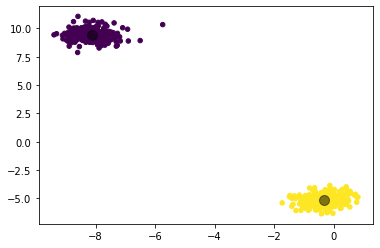

In [50]:
#plotting the clusters after runnig the initial k- means clustering - without scaling the data

plt.scatter(prediction_set[:, 0], prediction_set[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)


In [51]:
#lets do the basic clustering by giving 5 as the n_clusters


kmeans=KMeans(n_clusters=5,random_state=5,init="k-means++")

kmeans.fit(prediction_set)
y_kmeans=kmeans.predict(prediction_set)

print("inertia when the cluster sizes are 2:",kmeans.inertia_)

inertia when the cluster sizes are 2: 115.68682376046137


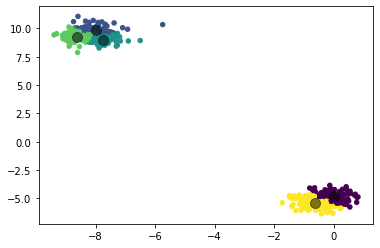

In [52]:
#plotting the clusters after runnig the initial k- means clustering - without scaling the data

plt.scatter(prediction_set[:, 0], prediction_set[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

[30135.618533858506, 221.53546147701087, 176.58371192171194, 140.80966770293807, 115.64284415185958, 94.85345465703756, 84.96874909175511, 75.7711604138263, 67.37658328825145, 62.512607373704085, 55.516678483919954, 52.38263076834191, 48.904416891154725, 46.033784043882335, 43.42318674840977, 40.48328661190066, 37.269126387121034, 36.66911790279379, 34.175483201014075]


Text(0, 0.5, 'Inertia')

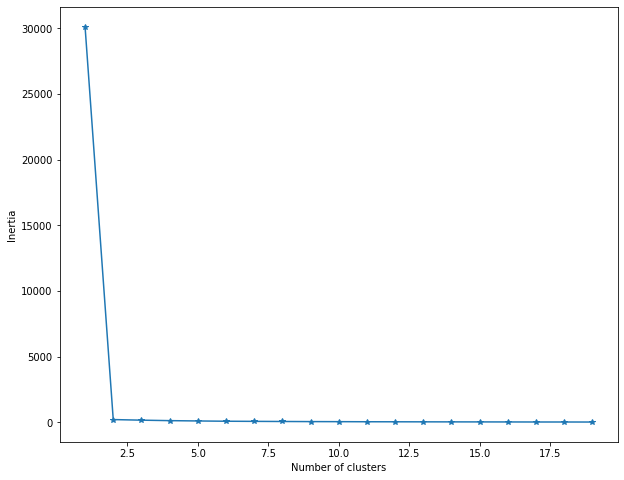

In [53]:
#lets plot the intertia with n_clusters and find out thebest number for number of clusters

ilist=[]

for cluster in range(1,20):
    kmeans=KMeans(n_clusters=cluster,n_jobs=-1, init="k-means++")
    kmeans.fit(prediction_set)
    
    ilist.append(kmeans.inertia_)

print(ilist)

#converting the results into a dataframe to plot them

frame=pd.DataFrame({'Cluster':range(1,20),"Inertia":ilist})
plt.figure(figsize=(10,8))

plt.plot(frame['Cluster'],frame['Inertia'], marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")


In [54]:
#lets use the min_max Scaler to scale the data and find the better clustering output

scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(prediction_set)

pd.DataFrame(data_scaled).describe()

,0,1
count,440.000000,440.000000
mean,0.506877,0.488175
std,0.385343,0.418311
min,0.000000,0.000000
25%,0.126413,0.071978
50%,0.554174,0.480558
75%,0.891766,0.904899
max,1.000000,1.000000


In [55]:
#lets do the final clustering using the value n_clusters as 2 because of the inertia graph

kmeans=KMeans(n_clusters=2,init="k-means++",verbose=2)
kmeans.fit(data_scaled)

y_kmeans=kmeans.predict(prediction_set)

print(silhouette_score(data_scaled, kmeans.labels_))



Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4213692743786703
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.4213692743786703
center shift 0.000000e+00 within tolerance 1.613691e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4213692743786703
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.4213692743786703
center shift 0.000000e+00 within tolerance 1.613691e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4213692743786703
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.4213692743786703
center shift 0.000000e+00 within tolerance 1.613691e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4213692743786703
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.4213692743786703
center shift 0.000000e+00 within tolerance 1.613691e-05
Initiali

In [56]:
prediction_set_final=prediction_set.astype(int)
display_all(prediction_set)
y_kmeans.shape

(440,)

In [0]:
#lets export the results to data frame

data['Clusters']=y_kmeans

export_csv = data.to_csv(r'/gdrive/My Drive/CIS_508/Assignments/Cluster_results_problem-2.csv')






,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [77]:
plt.plot(data['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'],data=data['Clusters']==0,)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

KeyError: ignored

In [101]:
# Visualize cluster shapes in 3d.

cluster1=data.loc[data['Clusters'] == 0]
cluster2=data.loc[data['Clusters'] == 1]


scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = data.values[:,2:-1], y = data.values[:,2:-1], z = data.values[:,2:-1],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = data.values[:,2:-1], y = data.values[:,2:-1], z = data.values[:,2:-1],
    marker = dict( size=2, color='blue')
)


cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = data.values[:,0], y = data.values[:,1], z = data.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = data.values[:,0], y = data.values[:,1], z = data.values[:,2],
    color='blue', showscale = True
)

layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
          yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, cluster1, cluster2], layout=layout )


plotly.offline.iplot(fig, filename='cluster_prob2')

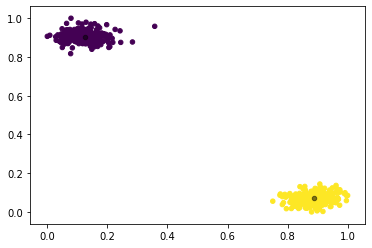

In [58]:
#lets plot the clusters

plt.scatter(data_scaled[:,0],data_scaled[:,1],c=y_kmeans,s=20,cmap='viridis')

centers=kmeans.cluster_centers_

plt.scatter(centers[:,0],centers[:,1],c='black',s=20,alpha=0.5)

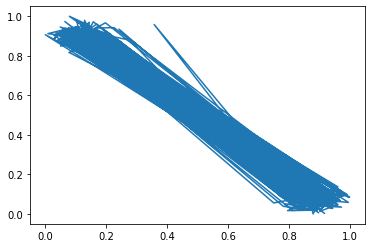

In [59]:
#lets plot the line of clusters

line, = plt.plot(data_scaled[:,0],data_scaled[:,1])





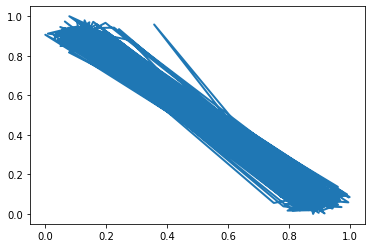

In [60]:
#lets plot the clusters

ln.Line2D(data_scaled[:,0],data_scaled[:,1],c=y_kmeans)

plt.plot(data_scaled[:,0],data_scaled[:,1], linewidth=2.0)